# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
'''
Loading data. Note that use python2 and hence had to load data using python3 and save it back so that it can be loaded
using python 2
'''
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train2.p'
testing_file = '../traffic-signs-data/test2.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, train_size, train_coord = train['features'], train['labels'], train['sizes'], train['coords']
X_test, y_test, test_size, test_coord = test['features'], test['labels'], test['sizes'], test['coords']

print('Training set', X_train.shape, y_train.shape, train_size.shape, train_coord.shape)
print('Test set', X_test.shape, y_test.shape, test_size.shape, test_coord.shape)


('Training set', (39209, 32, 32, 3), (39209,), (39209, 2), (39209, 4))
('Test set', (12630, 32, 32, 3), (12630,), (12630, 2), (12630, 4))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)
# TODO: Number of testing examples.
n_test = len(X_test)
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.amax(y_train)

print("Number of training examples = " ,n_train)
print("Number of testing examples = " ,n_test)
print("Image data shape = " ,image_shape)
print("Number of classes = " ,n_classes)

('Number of training examples = ', 39209)
('Number of testing examples = ', 12630)
('Image data shape = ', (32, 32, 3))
('Number of classes = ', 42)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

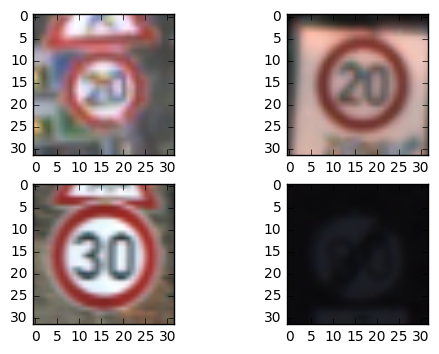

In [3]:
'''
Visualize data randomly to check is normalization is required or not
'''

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(1,1))
# Plot some images
fig = plt.figure()
grid = plt.subplot(2,2,1)
grid.imshow(X_train[0])
grid = plt.subplot(2,2,2)
grid.imshow(X_train[100])
grid = plt.subplot(2,2,3)
grid.imshow(X_train[1000])
grid = plt.subplot(2,2,4)
grid.imshow(X_train[10000])



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Data Analysis

* (1) Analyzed data for image quality and how to fix them using normalization
* (2) Class distribution



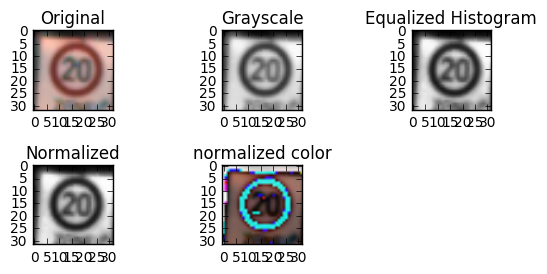

In [4]:
### Image quality
''' 
By plotting some of the example images it is evident that some of the images are dark and hence hard
to get any meaning full information. Hence it might be helpful to normalize the images. Further normalizing of images
would help the deep learning model to converge faster.

'''

import cv2

# Choose an image to visualize
im = 100

# Copy the image
orig = np.copy(X_train[im,:,:,:])

# Convert to grayscale
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

# Equalize the histogram
eq_gray = cv2.equalizeHist(gray)

# Normalize the values
norm_gray = eq_gray/255. - 0.5

# Plot the results
fig = plt.figure()

grid = plt.subplot(3,3,1)
grid.set_title('Original')
grid.imshow(orig)

grid = plt.subplot(3,3,2)
grid.set_title('Grayscale')
grid.imshow(gray, cmap='gray')

grid = plt.subplot(3,3,3)
grid.set_title('Equalized Histogram')
grid.imshow(eq_gray, cmap='gray')

grid = plt.subplot(3,3,4)
grid.set_title('Normalized')
grid.imshow(norm_gray, cmap='gray')

# Normalise input (images still in colour)
temp = (orig - X_train.mean()) / (np.max(X_train) - np.min(X_train))
# X_test = (orig - X_test.mean()) / (np.max(X_test) - np.min(X_test))

grid = plt.subplot(3,3,5)
grid.set_title('normalized color')
grid.imshow(temp)


plt.tight_layout()
plt.show()



39209 Observations


<Container object of 43 artists>

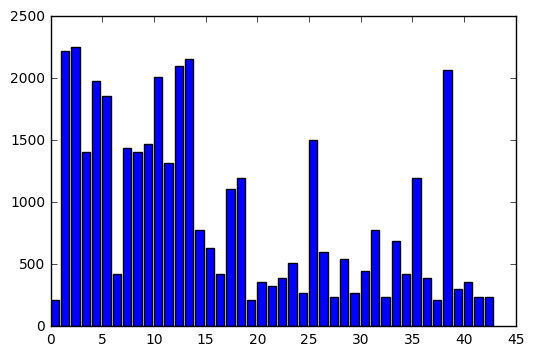

In [5]:
# class Distribution

''' class distribution shows that the number of images per class are skewed '''

item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T

print('%d Observations' % (y_train.shape[0]))
plt.bar(item, count)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

From the raw image data, it is evident that the image needs normalization so as extract better features. Secondly, the data also needs class distribution to be as uniform as possible. Hence, I decided to normalize the image in gray scale space and used affine transform from OPENCV to generate variants of the original data set so that the number of samples can be improved.

In [6]:
''' Convert data to gray scale and perform normalization of gray scale images '''

def pre_process_gray(images):
    # Convert images to grayscale
    normImg = []
    for i in range(images.shape[0]):
        gray = cv2.cvtColor(images[i,...], cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)
        norm_grey = gray/255. - 0.5
        normImg.append(norm_grey)
        
#     return np.array(normImg)
    normImg = np.array(normImg)
    return normImg[:,:,:,np.newaxis]


print("Original Training Data Size: ", X_train.shape)
print("Original Testing Data Size: " ,X_test.shape)
normalized_grayScale_train = pre_process_gray(X_train)
normalized_grayScale_test = pre_process_gray(X_test)
print("Normalized Traning Data Dims: ", normalized_grayScale_train.shape)
print("Normalized Testing Data Size: ", normalized_grayScale_test.shape)

('Original Training Data Size: ', (39209, 32, 32, 3))
('Original Testing Data Size: ', (12630, 32, 32, 3))
('Normalized Traning Data Dims: ', (39209, 32, 32, 1))
('Normalized Testing Data Size: ', (12630, 32, 32, 1))


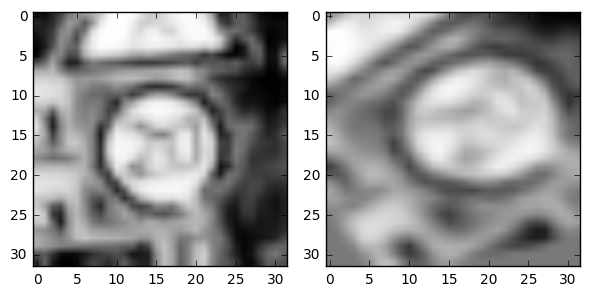

In [7]:
''' 
Class balancing by creating extra synthetic data from real data set. Utilize affine transform function from OpenCV.
Kernal Density fucntion from scikitlearn can also be utilized to do the same
'''



def transform_image(image, angle, shear, translation):
    ang_rot = np.random.uniform(angle) - angle/2
    rows, cols, color_channels = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

    trans_x = translation*np.random.uniform() - translation/2
    trans_y = translation*np.random.uniform() - translation/2
    translation_matrix = np.array([[1, 0, trans_x],[0, 1, trans_y]]).astype('float32')
    
    pts1 = np.array([[5,5],[20,5],[5,20]]).astype('float32')
    
    pt1 = 5 + shear*np.random.uniform()- shear/2
    pt2 = 20 + shear*np.random.uniform()- shear/2
    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_matrix = cv2.getAffineTransform(pts1, pts2)
        
    image = cv2.warpAffine(image, rotation_matrix, (cols,rows))
    image = cv2.warpAffine(image, translation_matrix,(cols,rows))
    image = cv2.warpAffine(image, shear_matrix, (cols,rows))
    
    return image

im = 0

transformed = transform_image(normalized_grayScale_train[im,...], 20, 10, 5)
stacked = np.dstack((normalized_grayScale_train[im,...], transformed))

grid = plt.subplot(1,2,1)
plt.imshow(stacked[...,0], cmap='gray')

grid = plt.subplot(1,2,2)
plt.imshow(transformed, cmap='gray')

plt.tight_layout()

In [8]:
''' seperate classes into different lists'''


def segregate_data_per_class(data,label, n_classes):
    segregated_data = []
    class_obs = []
    for classLabel in range(n_classes):
    #     print classLabel
        segregated_class = data[label == classLabel,:,:,:]
    #     print segregated_class.shape
        segregated_data.append(segregated_class)
        class_obs.append(segregated_class.shape[0])
    return segregated_data, class_obs

segregated_data, class_obs = segregate_data_per_class (normalized_grayScale_train, y_train, n_classes)   

print ('Number of observation per class: %r' %class_obs)



Number of observation per class: [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240]


In [9]:
'''
extend images per classes to get uniform distribution per class
'''

def expand_class_transform(images, n_obs):
    transformed_images = []
    
    if n_obs < 500: factor = 8
    elif n_obs < 1000: factor = 4
    else: factor = 2
    
    for image in images:
        for _ in range(factor-1):
            transformed_images.append(transform_image(image, 20, 10, 5))
    
    transformed_images = np.array(transformed_images)
    transformed_images = transformed_images[...,np.newaxis]
    expanded_class = np.concatenate((images, transformed_images), axis=0)
    return (expanded_class, expanded_class.shape[0])

def extended_data(data,label): 
    expanded_data = None
    expanded_labels = None
    for classLabel, images in enumerate(data):
        if expanded_data is None:
            expanded_data, obs = expand_class_transform(images, label[classLabel])
            expanded_labels = np.full(obs, classLabel, dtype='int64')
        else:
            tmp, obs = expand_class_transform(images, label[classLabel])
            expanded_data = np.concatenate((expanded_data, tmp), axis=0)
            expanded_labels = np.concatenate((expanded_labels, np.full(obs, classLabel, dtype='int64')), axis=0)
    return expanded_data, expanded_labels


expanded_data, expanded_labels = extended_data(segregated_data,class_obs) 
del segregated_data, class_obs # not needed anymore
print("Expanded Data Dims:\nData: %r | Labels: %r\n" % (expanded_data.shape, expanded_labels.shape))

Expanded Data Dims:
Data: (121376, 32, 32, 1) | Labels: (121376,)



In [10]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

''' (1) shuffle data and 
    (2) divide train data into 80-20 to generate a validation set 
    (3) Keep test data intact '''

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


X_train, y_train = shuffle(expanded_data, expanded_labels)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print('Training set', X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
print('Test set', normalized_grayScale_test.shape, y_test.shape)

('Training set', (97100, 32, 32, 1), (97100,), (24276, 32, 32, 1), (24276,))
('Test set', (12630, 32, 32, 1), (12630,))


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

''' (1) Use LeNet Model '''
import tensorflow as tf
from tensorflow.contrib.layers import flatten

IMAGE_SIZE = 32
IMAGE_DEPT = 1 # 3 for RBG and 1 for gray
N_CLASSES = n_classes
USE_DROPOUT = 1
## hyperparameters training parameters 

rate = 0.0001
EPOCHS = 200
BATCH_SIZE = 128
REGULARIZATION_PARAM = 0.0001

def LeNet(x):    
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    with tf.name_scope('conv_1'):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, IMAGE_DEPT, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)
        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    with tf.name_scope('conv_2'):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)
        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    with tf.name_scope('fc_1'):  
        # SOLUTION: Flatten. Input = 5x5x16. Output = 1296.
        fc0   = flatten(conv2)
        # SOLUTION: Layer 3: Fully Connected. Input = 1296. Output = 648.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1296, 1024), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(1024))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)
    
    with tf.name_scope('fc_2'):
        # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 512.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(512))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)
        if USE_DROPOUT:
            keep_prob = tf.placeholder('float')
            fc2 = tf.nn.dropout(fc2,keep_prob=0.5)
            print fc2.get_shape()

    with tf.name_scope('fc_3'):
        # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 256.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(256))
        fc3    = tf.matmul(fc2, fc3_W) + fc3_b

        # SOLUTION: Activation.
        fc3    = tf.nn.relu(fc3)
        if USE_DROPOUT:
            keep_prob = tf.placeholder('float')
            fc3 = tf.nn.dropout(fc3,keep_prob=0.75)
            print fc3.get_shape()

    with tf.name_scope('logit'):
        # SOLUTION: Layer 6: Fully Connected. Input = 256. Output = N_CLASSES (42).
        logit_W  = tf.Variable(tf.truncated_normal(shape=(256, N_CLASSES), mean = mu, stddev = sigma))
        logit_b  = tf.Variable(tf.zeros(N_CLASSES))
        logits = tf.matmul(fc3, logit_W) + logit_b
    
    return logits, [conv1_W, conv2_W, fc1_W, fc2_W, fc3_W, logit_W]


def regularization_cost(weights, regularization):
    reg_cost = 0.0
    for weight in weights:
        reg_cost += regularization * tf.nn.l2_loss(weight)
    return reg_cost

## create placeholdres for training and testing data

x = tf.placeholder(tf.float32, (None, IMAGE_SIZE, IMAGE_SIZE, IMAGE_DEPT))
tf.add_to_collection("x", x)  # Remember this Op.
y = tf.placeholder(tf.int32, (None) )
tf.add_to_collection("y", y)
one_hot_y = tf.one_hot(y, N_CLASSES)
tf.add_to_collection("one_hot_y", one_hot_y)  # Remember this Op.

logits, weights = LeNet(x)
tf.add_to_collection("logits", logits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) + regularization_cost(weights, REGULARIZATION_PARAM))
loss_operation = tf.reduce_mean(cross_entropy + regularization_cost(weights, REGULARIZATION_PARAM))
tf.add_to_collection('loss_operation', loss_operation)

# Optimization function 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = rate)

# Minimize loss function
training_operation = optimizer.minimize(loss_operation)


(?, 512)
(?, 256)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.add_to_collection('accuracy_operation', accuracy_operation)
MODEL_NAME = './checkpointModel/LeNet.ckpt'

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0.0
    total_loss = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, acc = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

saver = tf.train.Saver()
best_model = 1e-10

with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    print("Training...")
    train_accuracy = []
    valid_accuracy = []
    train_losses = []
    valid_losses = []
    train_loss = 0.0
    valid_loss = 0.0
    train_acc = 0.0
    valid_acc = 0.0
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss, acc = sess.run([training_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        train_loss, train_acc = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        train_accuracy.append(train_acc)
        train_losses.append(train_loss)
        valid_loss, valid_acc = evaluate(X_valid, y_valid)
        valid_accuracy.append(valid_acc)
        valid_losses.append(valid_loss)
        if valid_accuracy > best_model:
            saver.save(sess, MODEL_NAME, global_step=i)
            
#         print("EPOCH %d, Validation Accuracy %.3f"% ((i+1), valid_acc ) )
#         print("EPOCH %d, Validation Accuracy %.3f"% ((i+1), valid_acc ) )
#         print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if i % 20 == 0:
            print('Epoch: %d train loss: %.4f valid loss: %.4f train accuracy: %.4f valid accuracy: %.4f' %(i, train_loss, valid_loss, train_acc, valid_acc))
    print("Model saved")

Training...
Epoch: 0 train loss: 3.0386 valid loss: 3.3496 train accuracy: 0.3421 valid accuracy: 0.2886
Epoch: 20 train loss: 1.1076 valid loss: 1.1255 train accuracy: 0.7895 valid accuracy: 0.8290
Epoch: 40 train loss: 0.5472 valid loss: 0.9002 train accuracy: 0.9737 valid accuracy: 0.8787
Epoch: 60 train loss: 0.4567 valid loss: 0.7776 train accuracy: 0.9737 valid accuracy: 0.8981
Epoch: 80 train loss: 0.3251 valid loss: 0.6849 train accuracy: 1.0000 valid accuracy: 0.9057
Epoch: 100 train loss: 0.2573 valid loss: 0.6083 train accuracy: 1.0000 valid accuracy: 0.9123
Epoch: 120 train loss: 0.2186 valid loss: 0.5557 train accuracy: 1.0000 valid accuracy: 0.9132
Epoch: 140 train loss: 0.1662 valid loss: 0.4891 train accuracy: 1.0000 valid accuracy: 0.9198
Epoch: 160 train loss: 0.1382 valid loss: 0.4463 train accuracy: 0.9868 valid accuracy: 0.9222
Epoch: 180 train loss: 0.1115 valid loss: 0.4580 train accuracy: 1.0000 valid accuracy: 0.9197
Model saved


In [17]:
''' testing on test data set '''

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpointModel'))
    model_loss, model_perf = evaluate(normalized_grayScale_test, y_test)
    print model_perf
    print("Test Accuracy = {:.3f}".format(model_perf))


0.924544734532
Test Accuracy = 0.925


Confusion Matrix
[[ 0.57  0.17  0.   ...,  0.    0.    0.  ]
 [ 0.    0.95  0.   ...,  0.    0.    0.  ]
 [ 0.    0.01  0.95 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.01  0.07 ...,  0.74  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.83  0.  ]
 [ 0.    0.    0.   ...,  0.06  0.22  0.  ]]


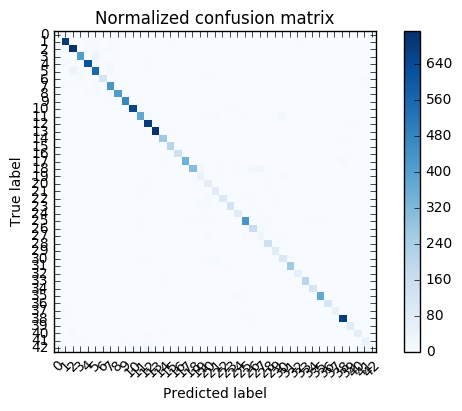

In [36]:
'''
Visualize Confusion matrix
'''

from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpointModel'))
    softmax = tf.nn.softmax(logits)
    normalized_prob = sess.run(softmax, feed_dict={x: normalized_grayScale_test})    
#     print normalized_prob.shape


## get the predicted class out of hte normalized prob
pred_class = []
for line in normalized_prob:
    pred_class.append(np.argmax(line))
    
pred_class = np.array(pred_class)
class_names = pd.read_csv('./signnames.csv')['SignName'].values
classID = pd.read_csv('./signnames.csv')['ClassId'].values


### Plot confusion Matrix
confmatrix = confusion_matrix(y_test, pred_class)
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=classID, normalize=True, title='Normalized confusion matrix')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Modified the LeNet model by adding dropout for the two fully connected layers. Further I also added L2 regularization for weights calculed at all the layers. 

Below are the hyper parameter which which the model was trained:
* IMAGE_SIZE = 32
* IMAGE_DEPT = 1 # 3 for RBG and 1 for gray
* N_CLASSES = n_classes
* learning rate = 0.0001
* EPOCHS = 50
* BATCH_SIZE = 128
* REGULARIZATION_PARAM = 0.0001

I played with the batch size, regularization parameters and learning rate. These configuration gave the best results.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I tried different trial and error method. I started with LeNet model and the raw images. The best accuracy I could get was around 80%. Hence I visually inspected few images which lead to the conclusion that some of the images are heavily influenced by lightening factors. Hence I normalized the images in gray space. As the paper the (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) they projected the image into YUV space. I will try that method as well to check for accuracy. 

I also did class balancing so that we have approximately same images for each of those classes. 

Lastly, I modified the LeNet model and introduced dropout factors at two levels in the Fully connected layer. I also introduced L2 regularization factor. 

I played with learing rate, Epochs and Batch size and other hyperparameter to get the most optimal results.

** future Venues to Explore: **

* Convert RGB image to YUV space and test the accuracy
* Look for other feature extraction techniques






---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


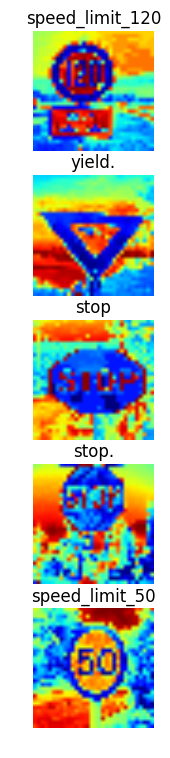

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import scipy.misc


NEW_IMAGES_FOLDER = '../newImages/'

labels = {0: 'stop',
          1: 'speed limit 50 km/h',
          2: 'speed limit 120 km/h',
          3: 'stop',
          4: 'yield'}

def resize_image_process(image_file):
    image = plt.imread(NEW_IMAGES_FOLDER + image_file)
#     print image.shape
    img = cv2.resize(image, (32,32))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    img = gray/255. - 0.5
    return img[:,:,np.newaxis]

def display_images(imgs_data):
    index = 1
    plt.figure(figsize=(4,9))
    for img, name in imgs_data:
        print img.shape
        plt.subplot(5, 1, index)
        plt.imshow(np.squeeze(img) )
        plt.axis('off')
        plt.title(name)
        index += 1
    plt.show()


resize_image = []
for image in os.listdir(NEW_IMAGES_FOLDER):
    resize_image.append( (resize_image_process(image), image[:-4]) )
display_images(resize_image)

X_test_new_dataset = [img_and_name[0] for img_and_name in resize_image]


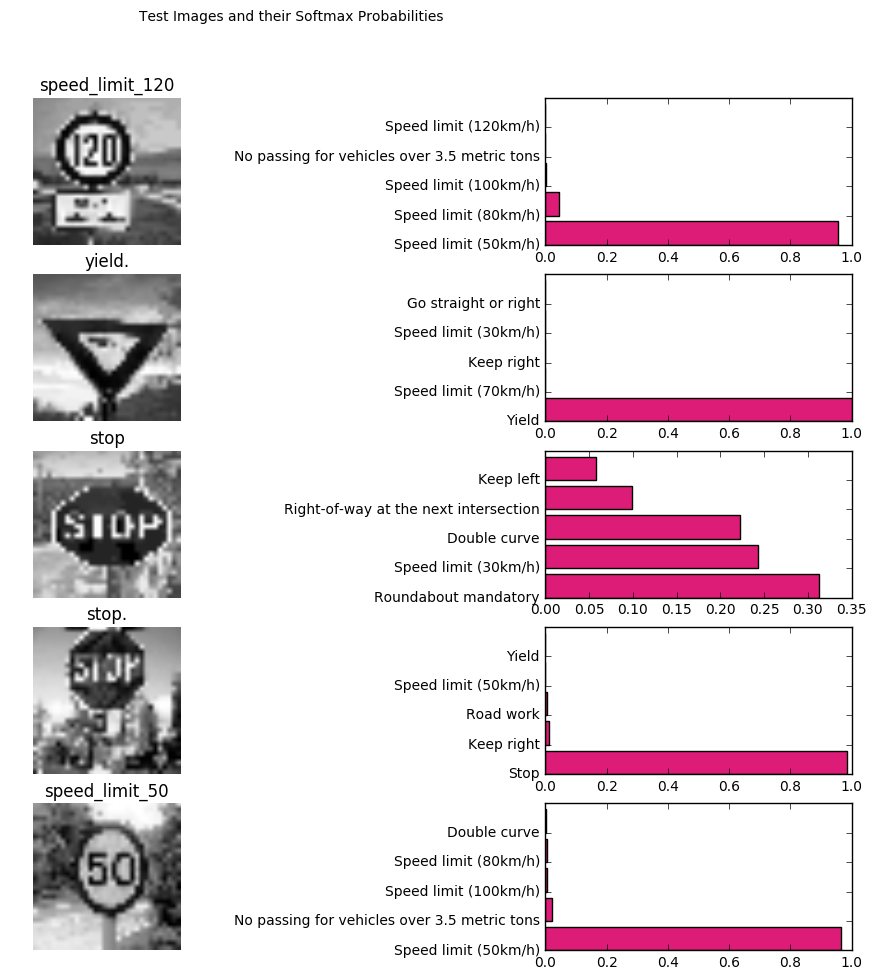

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

import pandas as pd
from matplotlib import gridspec

def print_result(ground_truth, top_k_prob, top_k_indices):
    class_names = pd.read_csv('./signnames.csv')['SignName'].values
    index = 0
    img_index = 0
    plt.figure(figsize=(14, 11))
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.45]) 
    for key in ground_truth:
        img, tag = resize_image[img_index]
        img_index += 1
        plt.subplot(gs[index])
        plt.imshow(np.squeeze(img), cmap='gray')
        plt.axis('off')
        plt.title(tag)
        index += 1

        plt.subplot(gs[index])
        plt.barh(np.arange(1, 6, 1), 
                 top_k_prob[key, :],
                 0.8, 
                 color='#dd1c77')
        plt.yticks(np.arange(1, 6, 1), class_names[top_k_indices[key, :]])
        index += 1
    plt.suptitle('Test Images and their Softmax Probabilities')
    plt.show()
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./checkpointModel'))
    softmax = tf.nn.softmax(logits)
    normalized_prob = sess.run(softmax, feed_dict={x: X_test_new_dataset})    
    top_k_op = tf.nn.top_k(normalized_prob, k=5)
    top_k_results = sess.run(top_k_op)
#     print top_k_results
    # show predictions with their probabilities
    print_result(labels, top_k_results.values, top_k_results.indices)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The accuracy is not that great especially for some of the signs which are very clear. For example the speedlimit sign of 120 km/h is clearly visible and my expectation was that the model should recognize it but its not doing that great.

For one of the stop signs as well its not doing that great. Further investigation in the modle parameters is required or class of images. 

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The plot above indicate the top 5 class most probable class for a given image. The third image (stop sign) is a very confusing image as the predictions are for different signs but not the stop sign. This is again worrying as the 'stop' letter are clearly visible. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.